

***THE SPARKS FOUNDATION***

Data Sciecne & Business Analytics Internship


### Created by : ABHISHEK BHASTE

## TASK 1: Prediction Using Supervised Machine Learning


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Reading first 5 observations
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Reading last 5 observations
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Five number summary of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Understanding the data

In [6]:
#will check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Will check for any missing values in dataset
df.isnull().sum() # Fortunately there aren't any missing values presnt 

Hours     0
Scores    0
dtype: int64

In [8]:
# checkin the number of columns and rows present in dataset
df.shape

(25, 2)

##### 25 rows and 2 columns are present dataset has

## Data visualization

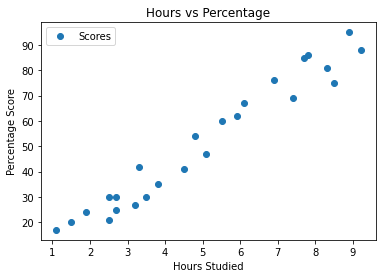

In [9]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**


In [10]:
#Here 'Scores' is our target variable

X = df.drop('Scores',axis=1)  
y = df['Scores']  

## Splitting the data into train and test for model building purposes

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [12]:
#checking shape of the splited data
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (20, 1)
X_test : (5, 1)
y_train : (20,)
y_test : (5,)


### **Training the Algorithm**


In [13]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
linreg.fit(X_train, y_train) 

LinearRegression()

In [14]:
print("beta1 :",linreg.coef_[0])
print("beta0:",linreg.intercept_)

beta1 : 9.910656480642237
beta0: 2.018160041434683


## Plotting the regression line

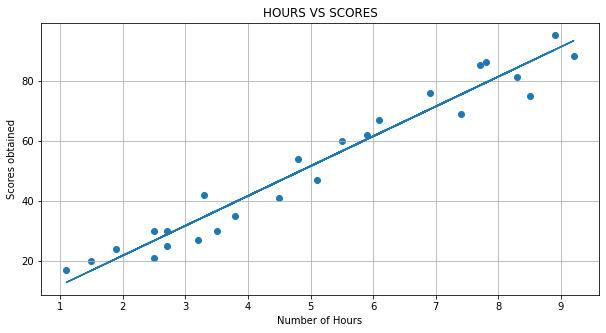

In [15]:
# since y = m*x + c 
line = linreg.coef_* X + linreg.intercept_

# Plotting for the test data
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('Number of Hours')
plt.ylabel('Scores obtained')
plt.title('HOURS VS SCORES')
plt.grid()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
y_pred = linreg.predict(X_test) # Predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
# Comparing Actual vs Predicted
prediction_compare = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})  
prediction_compare 

,Actual values,Predicted values
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### **Evaluating the model**

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Root mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Root mean squared error(RMSE): 4.6474476121003665
Mean Absolute Error: 4.183859899002975


# PROBLEM STATEMENT : Score for 9.25 hrs/day studies

In [20]:
hr = 9.25
F_pred = linreg.predict(np.array(hr).reshape(-1,1))
print('Number of HOURS :',hr)
print('Score may achive :',F_pred[0])

Number of HOURS : 9.25
Score may achive : 93.69173248737538


# END !